In [4]:
from collections import deque
import numpy as np 
import random
import time 
import matplotlib.pyplot as plt
import heapq

### Problem:
The project addresses the classic problem of maze solving – an analogy for numerous real-world navigation and pathfinding challenges. The goal is to find a path from a specified start point to an end point within a maze

### Modeling the problem:

1. ***Representation***:
   - The maze is represented as a two-dimensional list of numbers. Each inner list represents a row in the maze.

2. ***Navigating the maze***:
   - You can navigate the maze by moving up, down, left, or right, but cannot move diagonally. You also cannot pass through walls (1), and can only move through open spaces (0).

3. ***Valid Movements***:
   - When considering the movement from a cell, you can only move to a neighboring cell if it is within the bounds of the maze and is not a wall.

4. ***Path Reconstruction:***:
   - Once the end point is reached, reconstruct the path from the end point back to the start point by backtracking the cells visited. This is done by using a "prev" dictionary.

4. ***Start and End Points:***:
   - Defined start and end points. They are given as tuples (row, column) indicating their position in the maze.

### Utility methods:

In [5]:
def get_neighbors(pos, maze):
    """
    Get valid neighboring cells based on provided directions.

    Args:
        pos (Tuple[int, int]): Current cell position (row, column).
        maze (List[List[int]]): The maze represented as a 2D grid (0 for open path, 1 for obstacles).

    Returns:
        List[Tuple[int, int]]: List of neighboring cell positions.
    """
    # Right, Down, Left, Up
    dirs = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    neighbors = []
    for d in dirs:
        neighbor = (pos[0] + d[0], pos[1] + d[1])
        if (
            0 <= neighbor[0] < len(maze) and
            0 <= neighbor[1] < len(maze[0]) and
            # we check if we have an open path in this direction
            maze[neighbor[0]][neighbor[1]] == 0
            ): 
            neighbors.append(neighbor)
    return neighbors

In [6]:
def heuristic(p1, p2):
    """
    Compute the Manhattan distance between two points.
    """
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

### UNINFORMED SEARCH

In [7]:
def uninformed_search(maze, start, end, strategy='bfs'):
    if strategy == 'bfs':
        to_visit = deque([start])
    elif strategy == 'dfs':
        to_visit = [start]
    else:
        return "Pass a valid strategy from [bfs, dfs]"

    visited = set([start])
    prev = {start: None}

    while to_visit:
        if strategy == 'bfs':
            node = to_visit.popleft()
        else:
            node = to_visit.pop()

        if node == end:
            path = []
            # reconstruct the path back to the start node
            while node is not None:
                path.append(node)
                node = prev[node]
            return path[::-1]

        for neighbor in get_neighbors(node, maze):
            if neighbor not in visited:
                to_visit.append(neighbor)
                visited.add(neighbor)
                # save the node where we came from
                prev[neighbor] = node

    return None

### INFORMED SEARCH

### Greedy Best-First Search

In [8]:
def gbfs(maze, start, end):
    """
        Perform Greedy Best-First Search on a given maze and return the path found.
    """
    to_visit = [(heuristic(start, end), start)]
    prev = {start: None}
    visited = set()

    while to_visit:
        _dist , node = heapq.heappop(to_visit)

        if node == end:
            # reconstruct the path from start to end
            path = []
            while node:
                path.append(node)
                node = prev[node]
            return path[::-1]
        
        visited.add(node)
        
        for neighbor in get_neighbors(node, maze):
            if neighbor not in visited and neighbor not in prev:
                prev[neighbor] = node
                # the heap property for a min-heap ensures that the tuple with the smallest first element
                # (in this case, the smallest heuristic value) is always at the front of the list.
                heapq.heappush(to_visit, (heuristic(neighbor, end), neighbor))
    
    return None

#### Method to generate a maze from (https://medium.com/@msgold/using-python-to-create-and-solve-mazes-672285723c96)

In [7]:
def create_maze(dim):
    # Create a grid filled with walls
    maze = np.ones((dim*2+1, dim*2+1))

    # Define the starting point
    x, y = (0, 0)
    maze[2*x+1, 2*y+1] = 0

    # Initialize the stack with the starting point
    stack = [(x, y)]
    while len(stack) > 0:
        x, y = stack[-1]

        # Define possible directions
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        random.shuffle(directions)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if nx >= 0 and ny >= 0 and nx < dim and ny < dim and maze[2*nx+1, 2*ny+1] == 1:
                maze[2*nx+1, 2*ny+1] = 0
                maze[2*x+1+dx, 2*y+1+dy] = 0
                stack.append((nx, ny))
                break
        else:
            stack.pop()
            
    # Create an entrance and an exit
    maze[1, 0] = 0
    maze[-2, -1] = 0

    return maze

### Observations:

#### Compare on 7 by 7 maze 

In [24]:
maze = [[1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 1., 1., 0., 1.],
        [1., 0., 0., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1.]]

# Start and end positions
start = (1, 0)
end = (-2, -1)

# Adjust end position due to negative indexing
adjusted_end = (len(maze) + end[0], len(maze[0]) + end[1])

# Solve the maze using BFS
start_time = time.time()
bfs_path = uninformed_search(maze,start,adjusted_end, strategy='bfs')
bfs_execution_time = time.time() - start_time

# Solve the maze using DFS
start_time = time.time()
dfs_path = uninformed_search(maze,start,adjusted_end, strategy='dfs')
dfs_execution_time = time.time() - start_time

print("BFS path ->{}".format(bfs_path))
print("BFS exec time ->{}".format(bfs_execution_time))
print("DFS path ->{}".format(dfs_path))
print("DFS exec time ->{}".format(dfs_execution_time))

BFS path ->[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (5, 6)]
BFS exec time ->0.0009775161743164062
DFS path ->[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (5, 6)]
DFS exec time ->0.0


#### Compare on 11 by 11 maze 

In [9]:
maze = [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.],
        [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.],
        [1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.],
        [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]

# Start and end positions
start = (1, 0)
end = (-2, -1)

# Adjust end position due to negative indexing
adjusted_end = (len(maze) + end[0], len(maze[0]) + end[1])

# Solve the maze using BFS
start_time = time.time()
bfs_path = uninformed_search(maze,start,adjusted_end, strategy='bfs')
bfs_execution_time = time.time() - start_time

# Solve the maze using DFS
start_time = time.time()
dfs_path = uninformed_search(maze,start,adjusted_end, strategy='dfs')
dfs_execution_time = time.time() - start_time

# Solve the maze using gbfs
start_time = time.time()
gbfs_path = gbfs(maze, start, adjusted_end)
gbfs_execution_time = time.time() - start_time

print("BFS path ->{}".format(bfs_path))
print("BFS exec time ->{}".format(bfs_execution_time))
print("DFS path ->{}".format(dfs_path))
print("DFS exec time ->{}".format(dfs_execution_time))
print("gbfs path ->{}".format(gbfs_path))
print("gbfs exec time ->{}".format(gbfs_execution_time))

BFS path ->[(1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (5, 7), (5, 6), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5), (9, 6), (9, 7), (8, 7), (7, 7), (7, 8), (7, 9), (8, 9), (9, 9), (9, 10)]
BFS exec time ->0.0019195079803466797
DFS path ->[(1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (5, 7), (5, 6), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5), (9, 6), (9, 7), (8, 7), (7, 7), (7, 8), (7, 9), (8, 9), (9, 9), (9, 10)]
DFS exec time ->0.0
gbfs path ->[(1, 0), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 7), (5, 7), (5, 6), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5), (9, 6), (9, 7), (8, 7), (7, 7), (7, 8), (7, 9), (8, 9), (9, 9), (9, 10)]
gbfs exec time ->0.0


##### Compare the algorithms times on different sized mazes

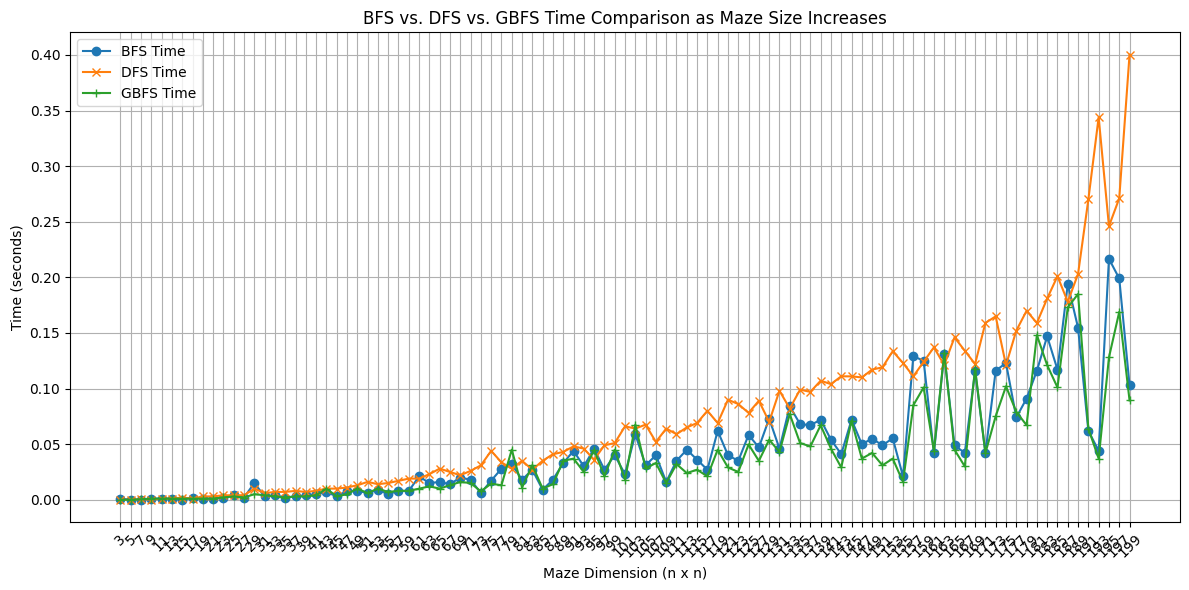

In [15]:
bfs_times = []
dsf_times = []
gbfs_times = []

dims = list(range(1,100))

# Start and end positions
start = (1, 0)
end = (-2, -1)

for maze_dim in dims:
    maze = create_maze(maze_dim)
    # Adjust end position due to negative indexing
    adjusted_end = (len(maze) + end[0], len(maze[0]) + end[1])

    # Solve the maze using BFS
    start_time = time.time()
    bfs_path = uninformed_search(maze,start,adjusted_end, strategy='bfs')
    bfs_execution_time = time.time() - start_time

    # Solve the maze using DFS
    start_time = time.time()
    dfs_path = uninformed_search(maze,start,adjusted_end, strategy='dfs')
    dfs_execution_time = time.time() - start_time

    # Solve the maze using GBFS
    start_time = time.time()
    gbfs_path = gbfs(maze, start, adjusted_end)
    gbfs_execution_time = time.time() - start_time

    if bfs_path == dfs_path == gbfs_path:
        bfs_times.append(bfs_execution_time)
        dsf_times.append(dfs_execution_time)
        gbfs_times.append(gbfs_execution_time)

# Extracting the dimensions as the X-axis values
dimensions_x = [i*2+1 for i in dims]

# Plotting BFS and DFS times
plt.figure(figsize=(12, 6))
plt.plot(dimensions_x, bfs_times, label='BFS Time', marker='o')
plt.plot(dimensions_x, dsf_times, label='DFS Time', marker='x')
plt.plot(dimensions_x, gbfs_times, label='GBFS Time', marker='+')

# Adding plot details
plt.title('BFS vs. DFS vs. GBFS Time Comparison as Maze Size Increases')
plt.xlabel('Maze Dimension (n x n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.xticks(dimensions_x, rotation=45)
plt.tight_layout()

plt.show()

#### Observations

* All have some kind of fluctuations in their execution, this might mean that the maze complixytu also affects the time 
* DFS usually performs on pair with bfs and gbfs but sometimes it may take way longer, this is prob because it search on the depth and might go in verry deep paths that don t get to the end
* BFS seems to have the steadiest increase but this is expected because bfs explores nodes level by level which would take longer as the maze increases
* GBFS has the most inconsistent performance at some points it s the fastest algo while at some other is the slowest, this is because of the heuristic used to determine the distance to the end. In some cases this heuristic might lead gbfs in less optimal directions 

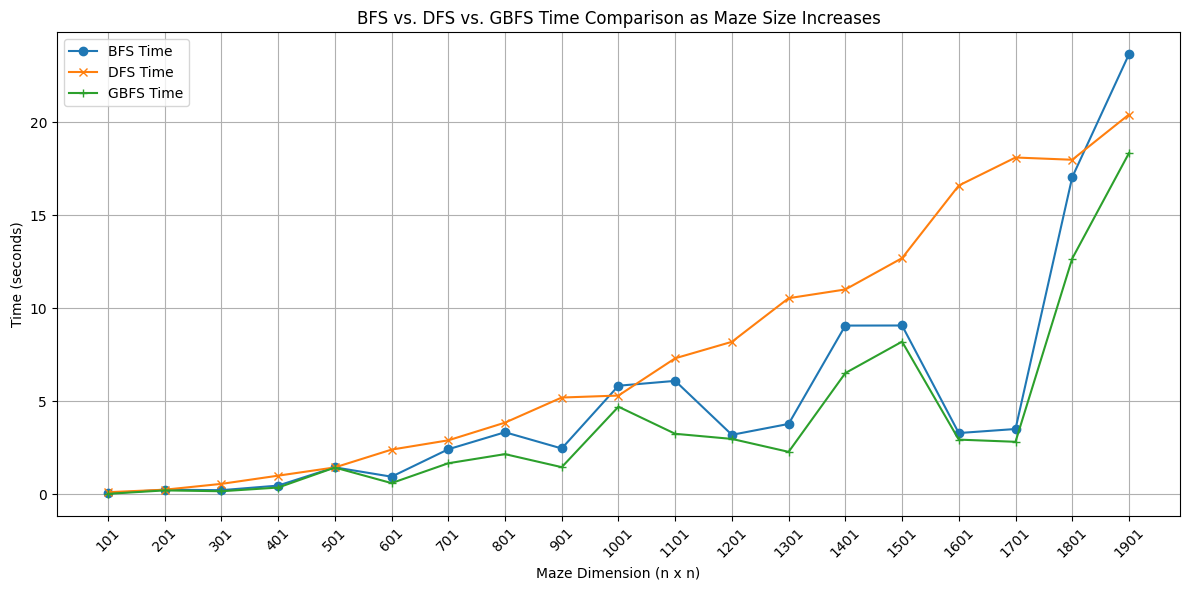

In [16]:
bfs_times = []
dsf_times = []
gbfs_times = []

dims = list(range(50,1000,50))

# Start and end positions
start = (1, 0)
end = (-2, -1)

for maze_dim in dims:
    maze = create_maze(maze_dim)
    # Adjust end position due to negative indexing
    adjusted_end = (len(maze) + end[0], len(maze[0]) + end[1])

    # Solve the maze using BFS
    start_time = time.time()
    bfs_path = uninformed_search(maze,start,adjusted_end, strategy='bfs')
    bfs_execution_time = time.time() - start_time

    # Solve the maze using DFS
    start_time = time.time()
    dfs_path = uninformed_search(maze,start,adjusted_end, strategy='dfs')
    dfs_execution_time = time.time() - start_time

    # Solve the maze using gbfs
    start_time = time.time()
    gbfs_path = gbfs(maze, start, adjusted_end)
    gbfs_execution_time = time.time() - start_time

    if bfs_path == dfs_path == gbfs_path:
        bfs_times.append(bfs_execution_time)
        dsf_times.append(dfs_execution_time)
        gbfs_times.append(gbfs_execution_time)

# Extracting the dimensions as the X-axis values
dimensions_x = [i*2+1 for i in dims]  

# Plotting BFS and DFS times
plt.figure(figsize=(12, 6))
plt.plot(dimensions_x, bfs_times, label='BFS Time', marker='o')
plt.plot(dimensions_x, dsf_times, label='DFS Time', marker='x')
plt.plot(dimensions_x, gbfs_times, label='GBFS Time', marker='+')

# Adding plot details
plt.title('BFS vs. DFS vs. GBFS Time Comparison as Maze Size Increases')
plt.xlabel('Maze Dimension (n x n)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.xticks(dimensions_x, rotation=45)
plt.tight_layout()

plt.show()